<a href="https://colab.research.google.com/github/MRnickRuss/AI/blob/main/Pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data, target

HTTPError: HTTP Error 404: Not Found

#### 1.2. Проектируем архитектуру для этой задачи

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline


x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

print(x_train[0])

#scaler = StandardScaler()  # Стандартизация по среднему и стандартному отклонению
scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

scaler.fit(data)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print(x_train.shape)
print(x_test.shape)
print(x_train)
print(x_test)

NameError: name 'data' is not defined

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(25, input_shape=(13,), activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                350       
                                                                 
 dense_1 (Dense)             (None, 12)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 675 (2.64 KB)
Trainable params: 675 (2.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [ ]:
model.compile(optimizer='Adam', loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [ ]:
history = model.fit(x_train, y_train, epochs=24, validation_data=(x_test, y_test))

Epoch 1/24
13/13 [==============================] - 5s 116ms/step - loss: 576.8049 - mae: 22.1270 - val_loss: 547.1765 - val_mae: 21.5510
Epoch 2/24
13/13 [==============================] - 0s 27ms/step - loss: 562.5577 - mae: 21.7785 - val_loss: 531.0587 - val_mae: 21.1577
Epoch 3/24
13/13 [==============================] - 0s 23ms/step - loss: 544.5245 - mae: 21.3364 - val_loss: 509.9554 - val_mae: 20.6290
Epoch 4/24
13/13 [==============================] - 0s 18ms/step - loss: 520.0587 - mae: 20.7034 - val_loss: 480.1886 - val_mae: 19.8472
Epoch 5/24
13/13 [==============================] - 0s 11ms/step - loss: 485.3966 - mae: 19.7454 - val_loss: 438.2631 - val_mae: 18.6879
Epoch 6/24
13/13 [==============================] - 0s 12ms/step - loss: 439.3446 - mae: 18.4088 - val_loss: 384.5787 - val_mae: 17.1336
Epoch 7/24
13/13 [==============================] - 0s 32ms/step - loss: 381.8823 - mae: 16.7002 - val_loss: 322.1577 - val_mae: 15.2572
Epoch 8/24
13/13 [======================

#### 1.6. Делаем предсказания на тестовых данных

In [ ]:
predict = model.predict(x_test)

4/4 [==============================] - 0s 8ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predict, y_test)

5.525603462668026

#### 1.8. Строим график обучения

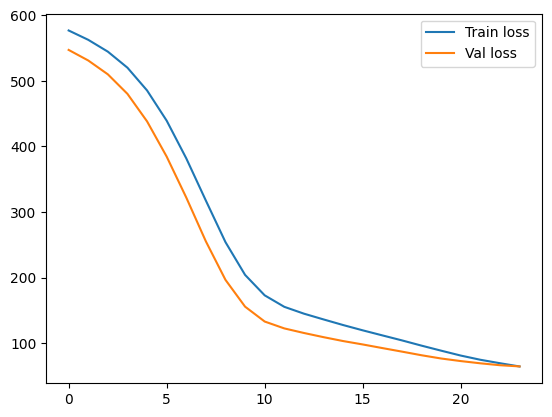

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [ ]:
def preprocess_input(features, scale_model="scaler.pkl"):
  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [ ]:
def predict_price(*features):
  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [ ]:
!pip install gradio --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s et

#### 2. Проверка обученной модели пользовательскими данными

In [ ]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="crim", minimum=0, maximum=100, step=0.01, value=0.35),
        gr.Slider(label="zn", minimum=0, maximum=100, step=0.01, value=0.0),
        gr.Slider(label="indus", minimum=0, maximum=100, step=0.01, value=6.2),
        gr.Slider(label="chas", minimum=0, maximum=1, step=1, value=1.0),
        gr.Slider(label="nox", minimum=0, maximum=1, step=0.01, value=0.5),
        gr.Slider(label="rm", minimum=1, maximum=10, step=0.1, value=6.9),
        gr.Slider(label="age", minimum=0, maximum=100, step=1, value=88),
        gr.Slider(label="dis", minimum=0.5, maximum=10, step=0.1, value=2.86),
        gr.Slider(label="tax", minimum=10, maximum=500, step=5, value=8),
        gr.Slider(label="ptatio", minimum=1, maximum=100, step=0.1, value=307),
        gr.Slider(label="b", minimum=10, maximum=1000, step=5, value=17.4),
        gr.Slider(label="istat", minimum=0.1, maximum=100, step=0.1, value=391),
        gr.Slider(label="medv", minimum=10, maximum=100, step=1, value=9.7),
    ],
    # Обновление при каждом изменении
    # live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1fe6ef1a45591deb06.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1fe6ef1a45591deb06.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [5]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 2. Загружаем набор данных:

### 3. Указываем путь к набору данных:

In [ ]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/gdrive/MyDrive/archive_2/Data")))
random.shuffle(imagePaths)

### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:/content/gdrive/MyDrive/archive
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [ ]:
compression_size = 32
data, labels = load_images(imagePaths, compression_size)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
(trainX, valX, trainY, valY) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42)

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
valY = lb.transform(valY)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
input_shape = (compression_size * compression_size * 3,)

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=input_shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### 5.3. Компилируем модель:

In [ ]:
INIT_LR = 0.0001
EPOCHS = 4

opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [6]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [ ]:
H = model.fit(trainX, trainY,
              validation_data=(valX, valY),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/4
23/23 [==============================] - 3s 27ms/step - loss: 0.7758 - accuracy: 0.6736 - val_loss: 0.4575 - val_accuracy: 0.8329
Epoch 2/4
10/23 [============>.................] - ETA: 0s - loss: 0.3889 - accuracy: 0.8730

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 0s 17ms/step - loss: 0.3418 - accuracy: 0.8943 - val_loss: 0.2579 - val_accuracy: 0.9337
Epoch 3/4
23/23 [==============================] - 0s 15ms/step - loss: 0.2334 - accuracy: 0.9261 - val_loss: 0.2064 - val_accuracy: 0.9363
Epoch 4/4
23/23 [==============================] - 0s 7ms/step - loss: 0.1738 - accuracy: 0.9522 - val_loss: 0.1927 - val_accuracy: 0.9271


#### 6.3. Загружаем лучшую модель:

In [ ]:
from keras.models import load_model

modeldrive = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))


24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       anime       0.93      0.99      0.96       257
     cartoon       0.98      0.87      0.92       261
       human       0.90      0.95      0.93       236

    accuracy                           0.94       754
   macro avg       0.94      0.94      0.94       754
weighted avg       0.94      0.94      0.94       754



#### 7.2. Выведем матрицу ошибок

24/24 [==============================] - 0s 2ms/step


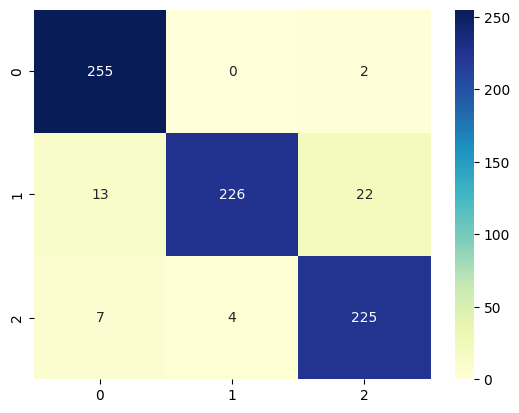

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(valX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
valY = valY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(valY, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

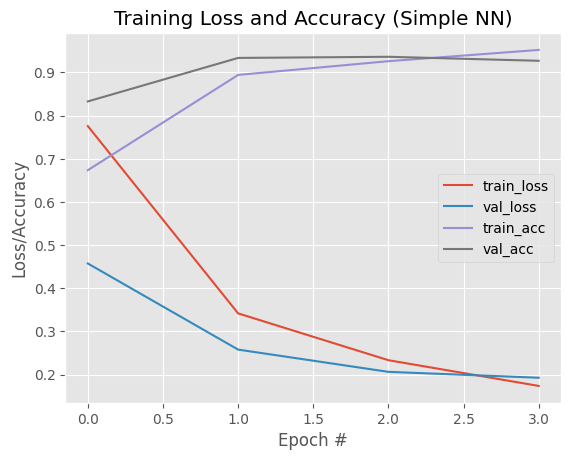

In [ ]:
# строим графики потерь и точности
N = np.arange(0, len(H.history["loss"]))
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

### 8. Сохранение модели и меток классов:

In [ ]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))


In [ ]:
model_path = "/content/gdrive/MyDrive/model/model2.h5"
labels_path = "/content/gdrive/MyDrive/label/labels2"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
from keras.models import load_model
modeldrive = load_model('/content/gdrive/MyDrive/model/model3.keras')

In [31]:
modeldrive

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [9]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.3 MB/s eta

In [10]:
# from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
# # Функция для предобработки изображения
# def preprocess_image(img, compression_size = 32):

#     """
#     Функция для изменения размера, "выравнивания" и масштабирования изображения.

#     Args:
#     img: Изображение.

#     Returns:
#     Предобработанное изображение.
#     """

#     image = img.copy()  # Создаем копию изображения
#     # Изменяем размер изображения до compression_size x compression_size пикселей
#     image = cv2.resize(image, (compression_size, compression_size))
#     # Преобразуем изображение в одномерный массив (вектор)
#     image = image.flatten()
#     # Масштабируем значения пикселей к диапазону [0, 1]
#     image = image.astype("float") / 255.0
#     # Преобразуем массив в формат, совместимый с нашей моделью Keras
#     image = image.reshape((1, image.shape[0]))

#     return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
# lb = pickle.loads(open("/content/gdrive/MyDrive/label/labels2", "rb").read())  # Загрузка словаря с метками

# def predict_image(img, lb, preprocess_func = preprocess_image):

#     """
#     Функция для выполнения предсказания класса, возвращает
#     словарь с вероятностями для каждого класса.

#     Args:
#     img: Изображение.
#     preprocess_funk: Функция для предобработки изображения.
#     model_path: Путь к файлу модели.
#     label_path: Путь к файлу с метками.

#     Returns:
#     Словарь с метками и вероятностями для каждого класса.
#     """

#     # Загружаем модель и метки
#     model = load_model('/content/gdrive/MyDrive/model/model2.h5')  # Загрузка модели Keras
#     # lb = pickle.loads(open(labels_path, "rb").read())  # Загрузка словаря с метками

#     # Делаем предсказание на изображении
#     image = preprocess_func(img.copy())  # Предобработка изображения
#     preds = model.predict(image).flatten()  # Выполнение предсказания

#     # Возвращаем словарь с метками и вероятностями для каждого класса
#     confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

#     return confidences

In [ ]:
# lb = pickle.loads(open("/content/gdrive/MyDrive/label/labels3", "rb").read())  # Загрузка словаря с метками

# def get_predict_new(img, lb, preprocess_func = preprocess_image, model_path = "/content/gdrive/MyDrive/model/model3.keras"):

#   model = load_model("/content/gdrive/MyDrive/model/model3.keras")
#   image = preprocess_image(img.copy())
#   image = image.reshape(-1, 32, 32, 3)
#   preds = model.predict(image)
#   # print(preds.shape)
#   # print(preds[0][0])
#   # print(preds[0][1])
#   # print(len(preds[0]))
#   # confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(new_preds))}
#   confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

#   return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# # Создаем интерфейс Gradio
# interface = gr.Interface(
#     fn=get_predict_new,  # Функция, которая будет вызываться при загрузке изображения
#     inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
#     outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
#     examples = ["/content/gdrive/MyDrive/Images/00989.png","/content/gdrive/MyDrive/Images/7_42.jpg","/content/gdrive/MyDrive/Images/844_2000.jpg"]
#     )

# # Запускаем интерфейс
# interface.launch(debug=True, share=True)

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1011: UserWarning: Expected at least 2 arguments for function <function get_predict_new at 0x7af1665852d0>, received 1.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://05548a7f76b74a9f0a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 207ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 521, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1945, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1513, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    r

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://05548a7f76b74a9f0a.gradio.live


In [38]:
def preprocess_image(img, compression_size = 32):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

In [43]:
labels_path = pickle.loads(open("/content/gdrive/MyDrive/label/labels2", "rb").read())  # Загрузка словаря с метками

def predict_image(img, preprocess_func = preprocess_image):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    # Загружаем модель и метки
    model = load_model('/content/gdrive/MyDrive/model/model2.h5')  # Загрузка модели Keras
    lb = pickle.loads(open('/content/gdrive/MyDrive/label/labels2', "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [44]:
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples = ["/content/gdrive/MyDrive/Images/00989.png","/content/gdrive/MyDrive/Images/7_42.jpg","/content/gdrive/MyDrive/Images/844_2000.jpg"]
    )

# Запускаем интерфейс
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0b811be2bbd21c5856.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 82ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0b811be2bbd21c5856.gradio.live
